## Description
It takes a GWAS on a random phenotype and verifies that the Manhattan and QQ-plots look fine (without inflation).

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy.stats import uniform

In [20]:
GWAS_DIR = "/mnt/data/proj_data/nullsim/compressed/"

In [21]:
def load_gwas_data(filename):
    """Load GWAS data, filter P values, and return a DataFrame."""
    filepath = os.path.join(GWAS_DIR, filename)
    gwas = pd.read_csv(filepath, sep="\t")
    gwas = gwas[(gwas["P"] >= 0) & (gwas["P"] <= 1)]
    return gwas

In [22]:
def plot_manhattan(gwas, chr_col, bp_col, p_col, snp_col, title):
    """Generate a Manhattan plot."""
    gwas["-log10P"] = -np.log10(gwas[p_col])
    plt.figure(figsize=(20, 10))
    gwas[chr_col] = gwas[chr_col].astype("category")
    gwas.sort_values(by=[chr_col, bp_col], inplace=True)
    gwas["ind"] = range(len(gwas))
    groups = gwas.groupby(chr_col)

    for i, (name, group) in enumerate(groups):
        plt.scatter(
            group["ind"],
            group["-log10P"],
            s=5,
            label=name,
            color=plt.cm.tab20.colors[i % 20]
        )

    plt.axhline(-np.log10(5e-8), color="red", linestyle="--", label="Genome-wide line")
    plt.xlabel("Chromosome")
    plt.ylabel("-log10(p-value)")
    plt.title(title)
    plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(0, 10)
    plt.tight_layout()
    plt.show()

In [26]:
def plot_qq(p_values, title):    
    """Generate a QQ plot for GWAS p-values."""
    # Use the uniform distribution as the null distribution!!!
    # Do -log10 transformation to p-values!
    # use func qq plot 2samples
    # x: expected array
    # y: observed array
    
    # Use np.random.unitform to generate expected values with the same size as the observed p_values
    # Or may use linspace instead of random.uniform, don't include 0 and 1. maybe 1 is okay but 0 is not.
    
    # Run TWAS when 
    
    # Calculate expected p-values (under uniform distribution)
    n = len(p_values)
    expected_p_values = np.arange(1, n + 1) / (n + 1)
    
    # Convert to -log10 scale
    observed_log_p = -np.log10(p_values)
    expected_log_p = -np.log10(expected_p_values)
    
    qqplot_2samples(expected_log_p, observed_log_p, xlabel="Expected -log10(p)", ylabel="Observed -log10(p)", line='45')
    plt.title(title)
    plt.show()

Phenotype 0: Dimensions = (9284812, 8)
   #CHROM    POS           ID REF A1      BETA        SE         P
0       1  17594  rs377698370   C  T -0.074931  0.076255  0.325814
1       1  17746  rs370884870   A  G  0.214425  0.110874  0.053147
2       1  54421  rs146477069   A  G  0.069911  0.065927  0.288978
3       1  61920   rs62637820   G  A -0.035090  0.066085  0.595439
4       1  62738   rs11810446   T  C  0.027072  0.057738  0.639164


/home/haoyu/anaconda3/envs/rap/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_3838207/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


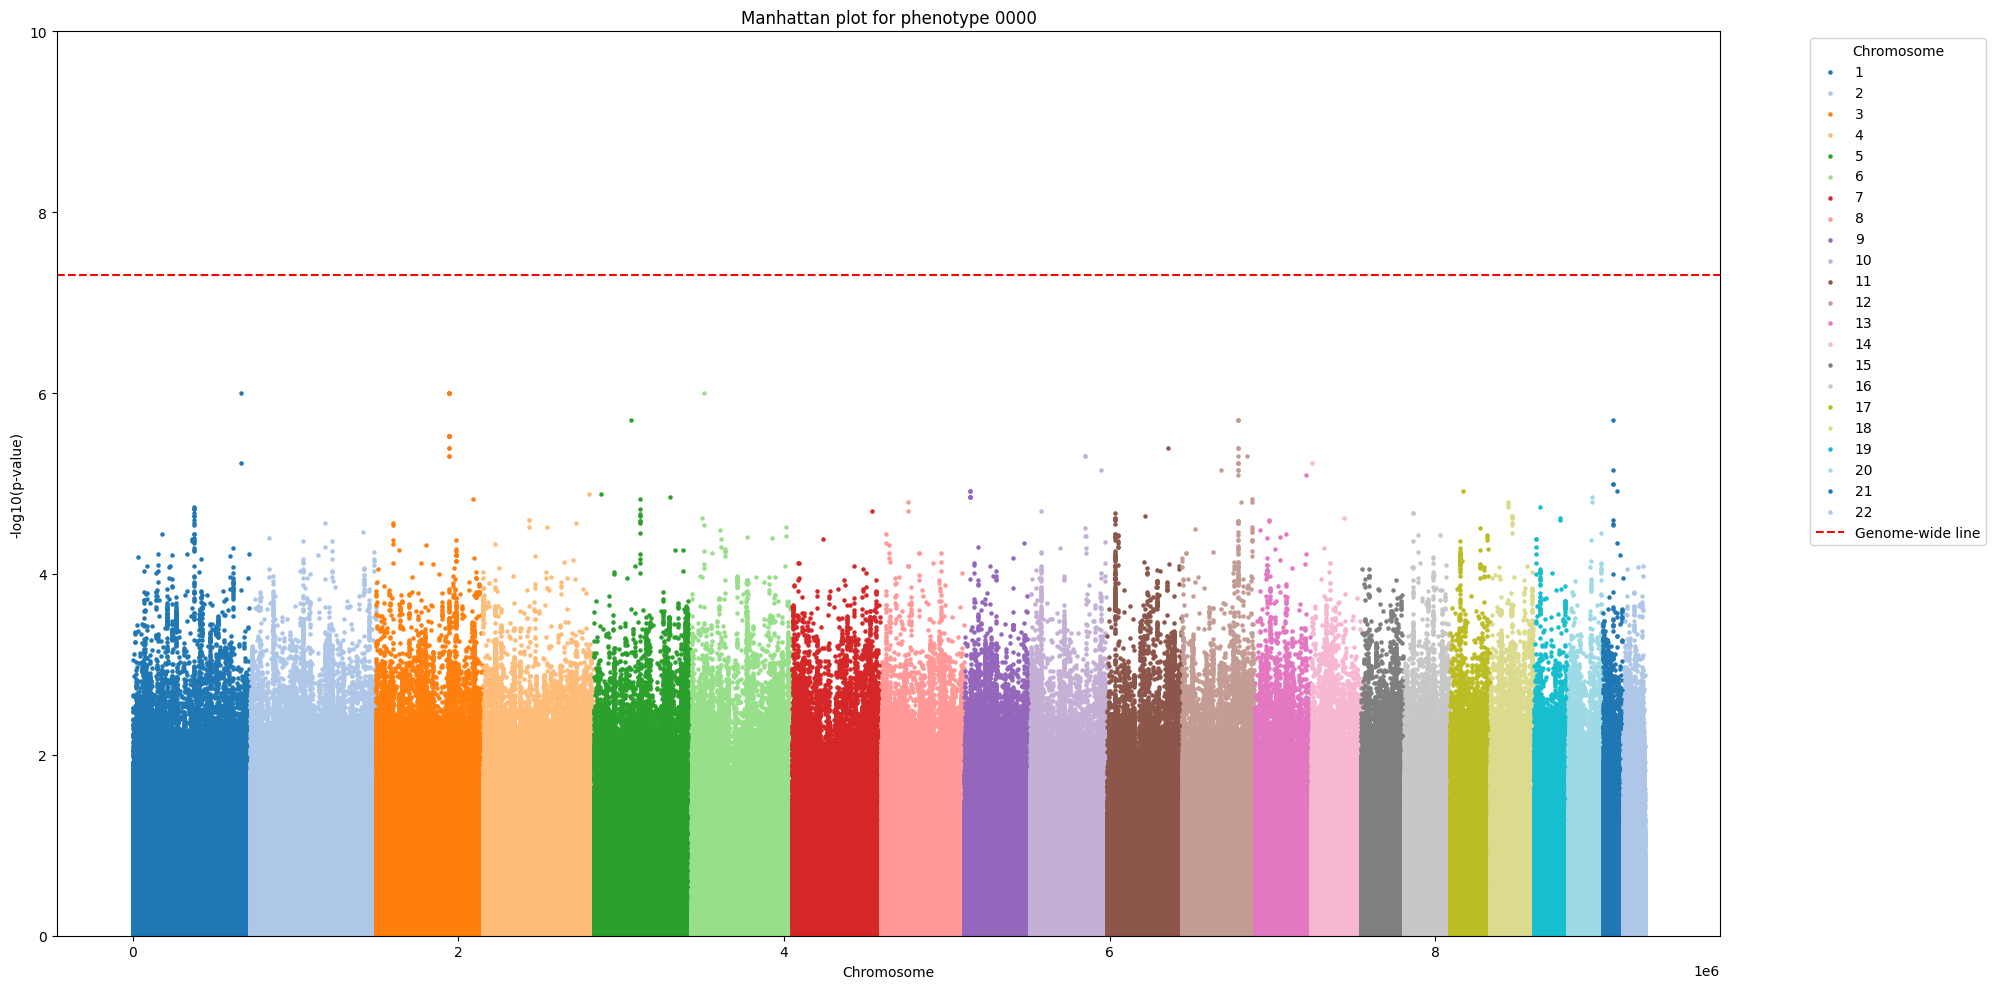

/home/haoyu/anaconda3/envs/rap/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


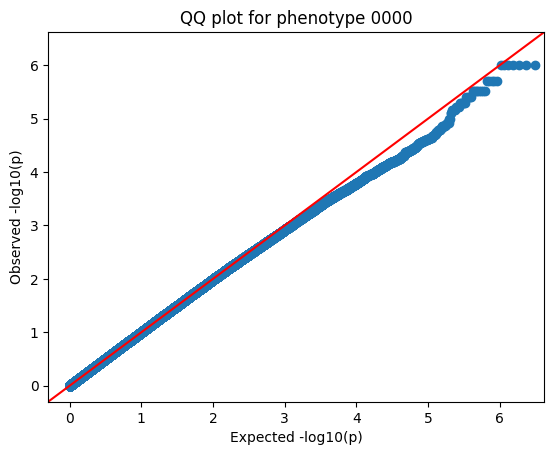

Phenotype 1: Dimensions = (9284812, 8)
   #CHROM    POS           ID REF A1      BETA        SE         P
0       1  17594  rs377698370   C  T -0.061745  0.077635  0.426449
1       1  17746  rs370884870   A  G  0.171412  0.112886  0.128933
2       1  54421  rs146477069   A  G  0.064208  0.067120  0.338787
3       1  61920   rs62637820   G  A  0.025184  0.067280  0.708174
4       1  62738   rs11810446   T  C  0.010903  0.058783  0.852851


/tmp/ipykernel_3838207/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


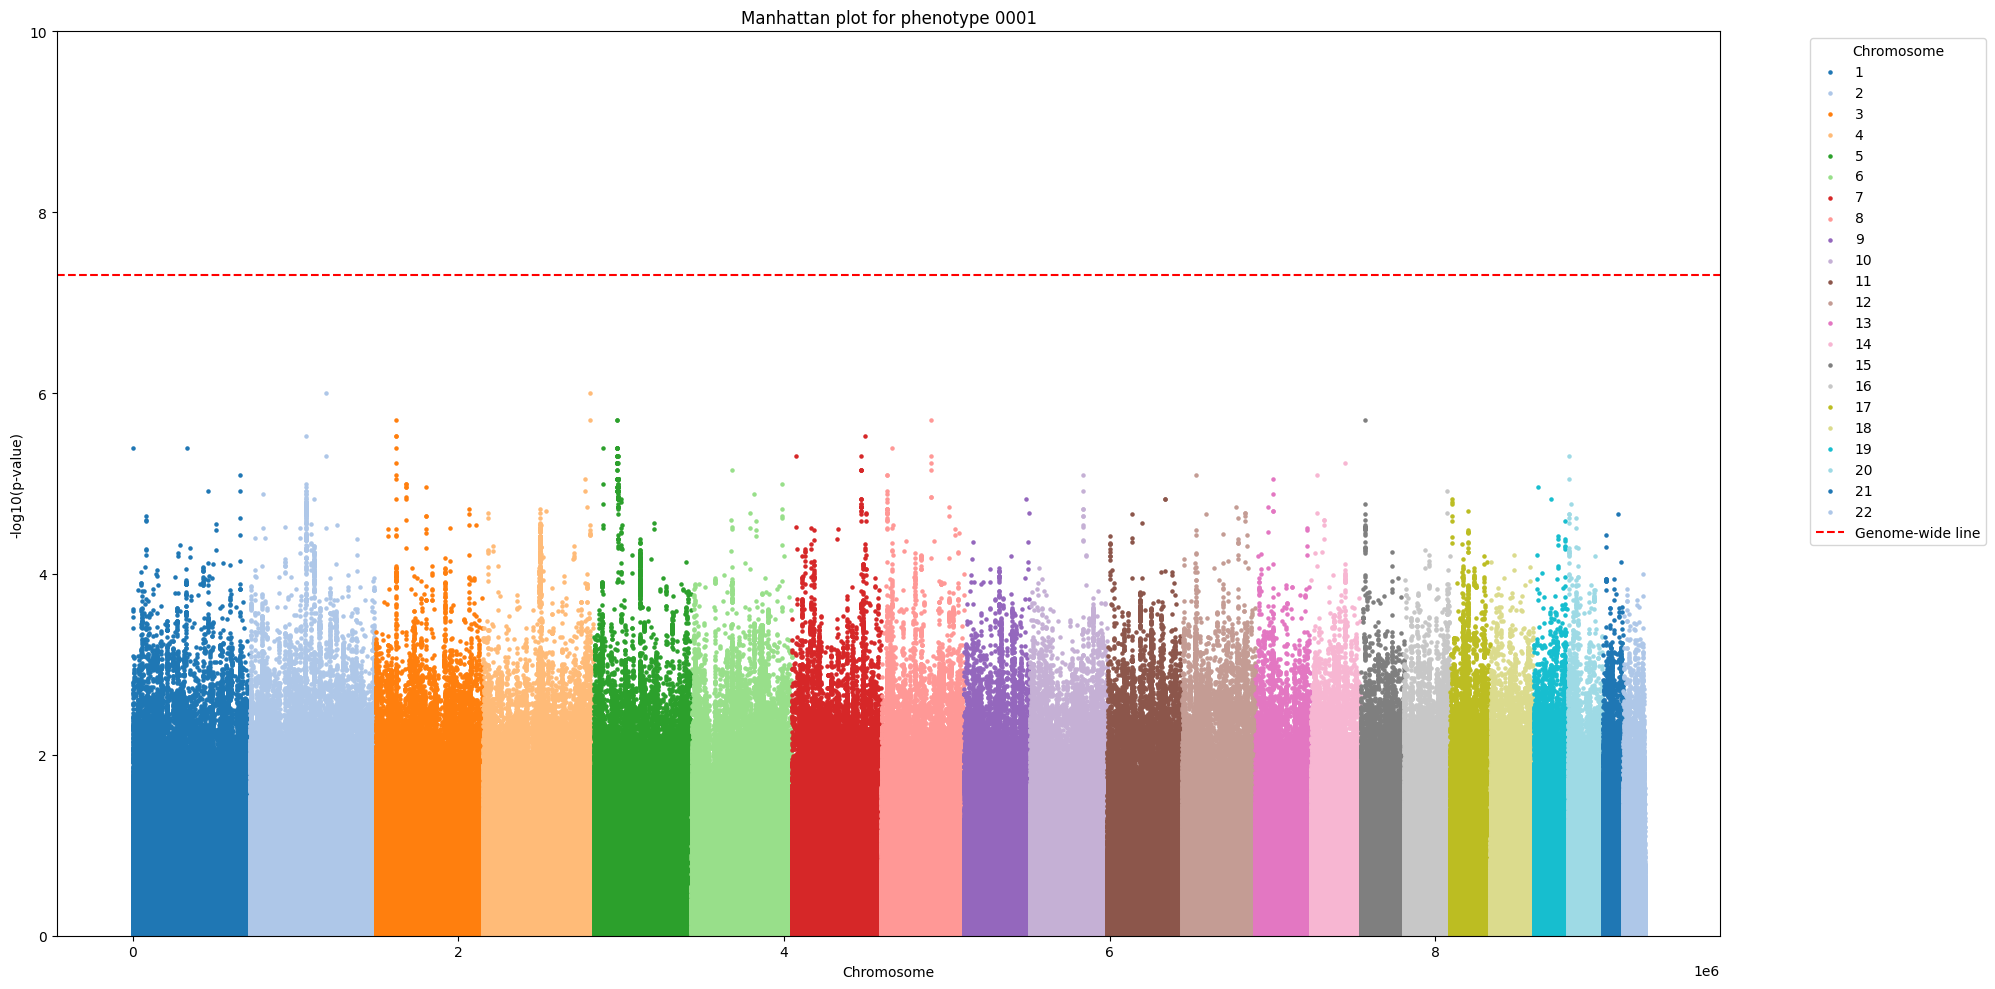

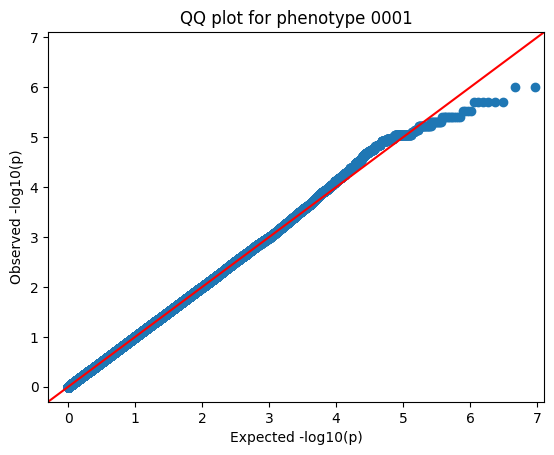

Phenotype 2: Dimensions = (9284812, 8)
   #CHROM    POS           ID REF A1      BETA        SE         P
0       1  17594  rs377698370   C  T  0.119885  0.077295  0.120930
1       1  17746  rs370884870   A  G -0.105279  0.112409  0.349001
2       1  54421  rs146477069   A  G  0.012313  0.066834  0.853841
3       1  61920   rs62637820   G  A  0.028146  0.066990  0.674381
4       1  62738   rs11810446   T  C  0.017320  0.058530  0.767301


/home/haoyu/anaconda3/envs/rap/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_3838207/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


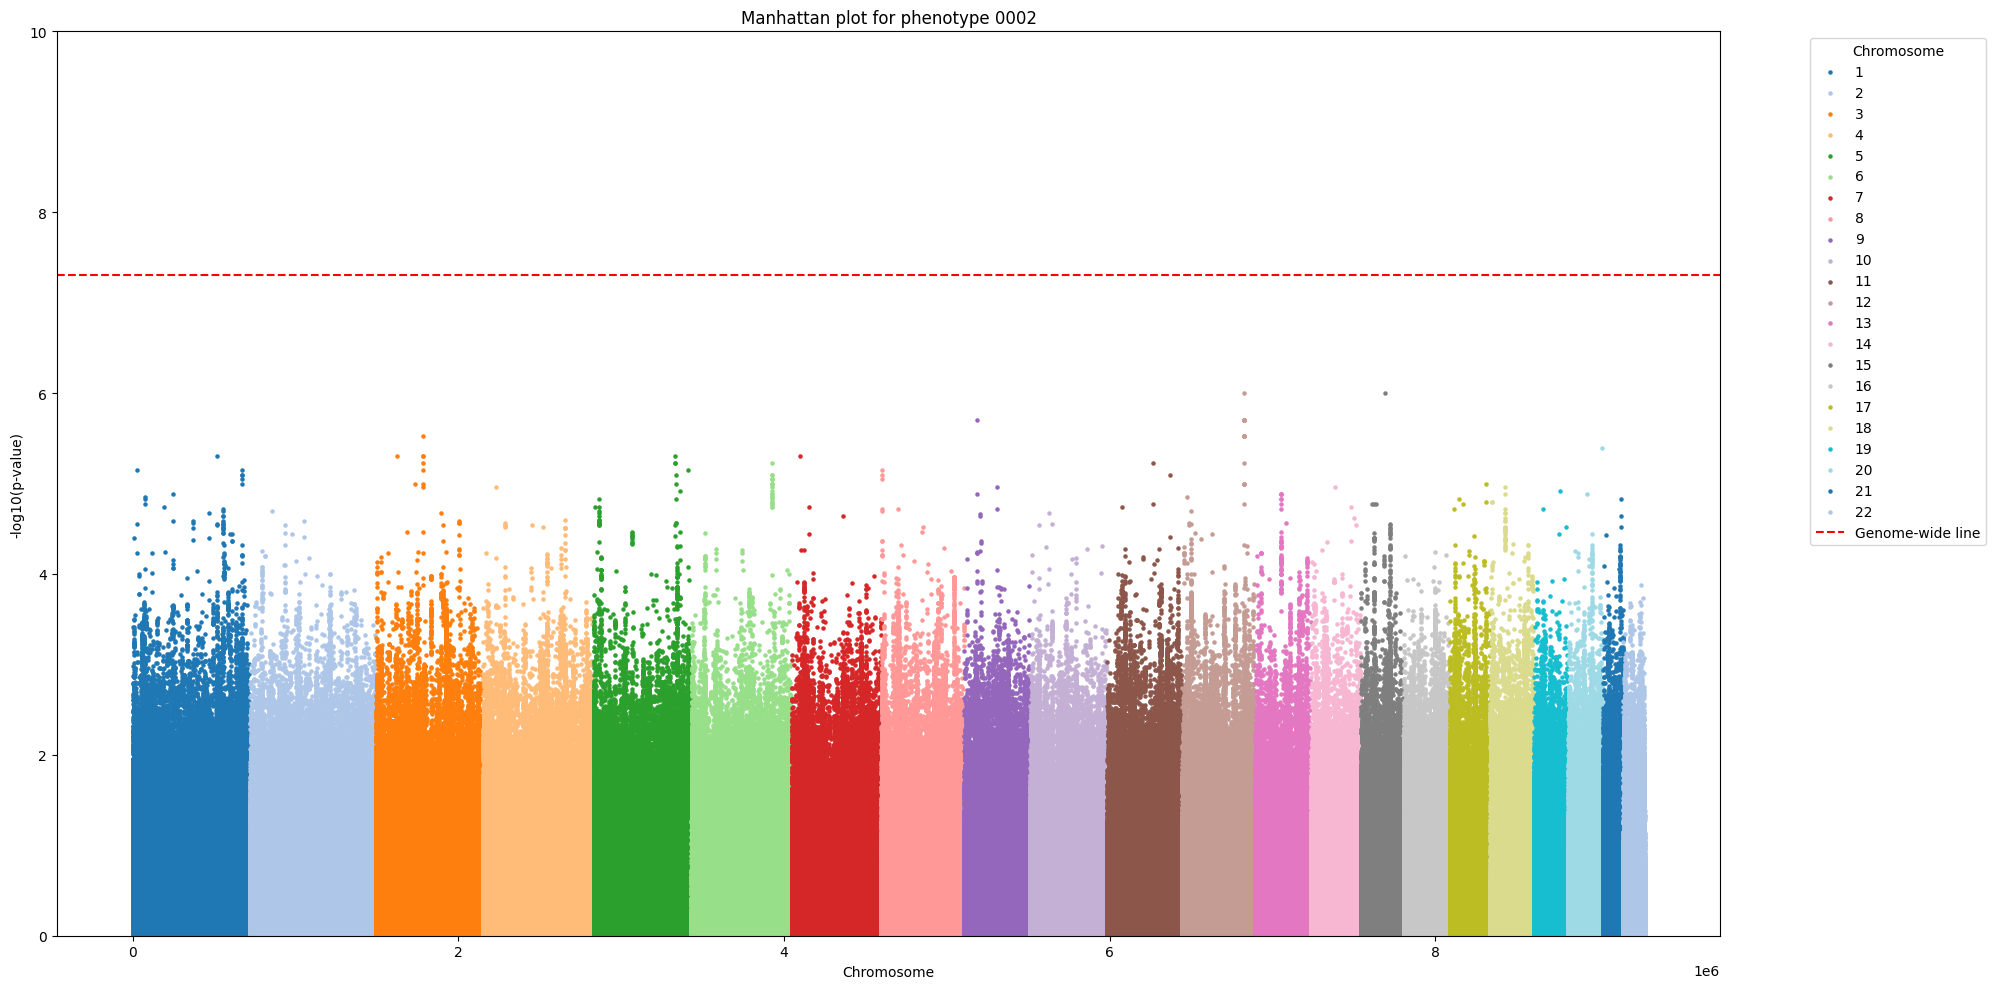

/home/haoyu/anaconda3/envs/rap/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


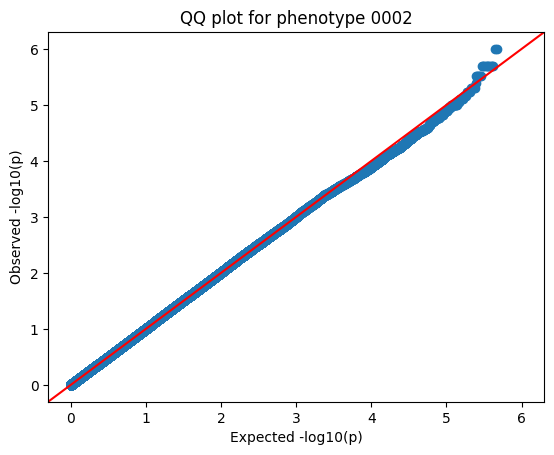

Phenotype 3: Dimensions = (9284812, 8)
   #CHROM    POS           ID REF A1      BETA        SE         P
0       1  17594  rs377698370   C  T  0.108154  0.078306  0.167253
1       1  17746  rs370884870   A  G -0.121597  0.113875  0.285632
2       1  54421  rs146477069   A  G -0.155154  0.067689  0.021917
3       1  61920   rs62637820   G  A  0.027999  0.067865  0.679933
4       1  62738   rs11810446   T  C -0.131937  0.059279  0.026058


/home/haoyu/anaconda3/envs/rap/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_3838207/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


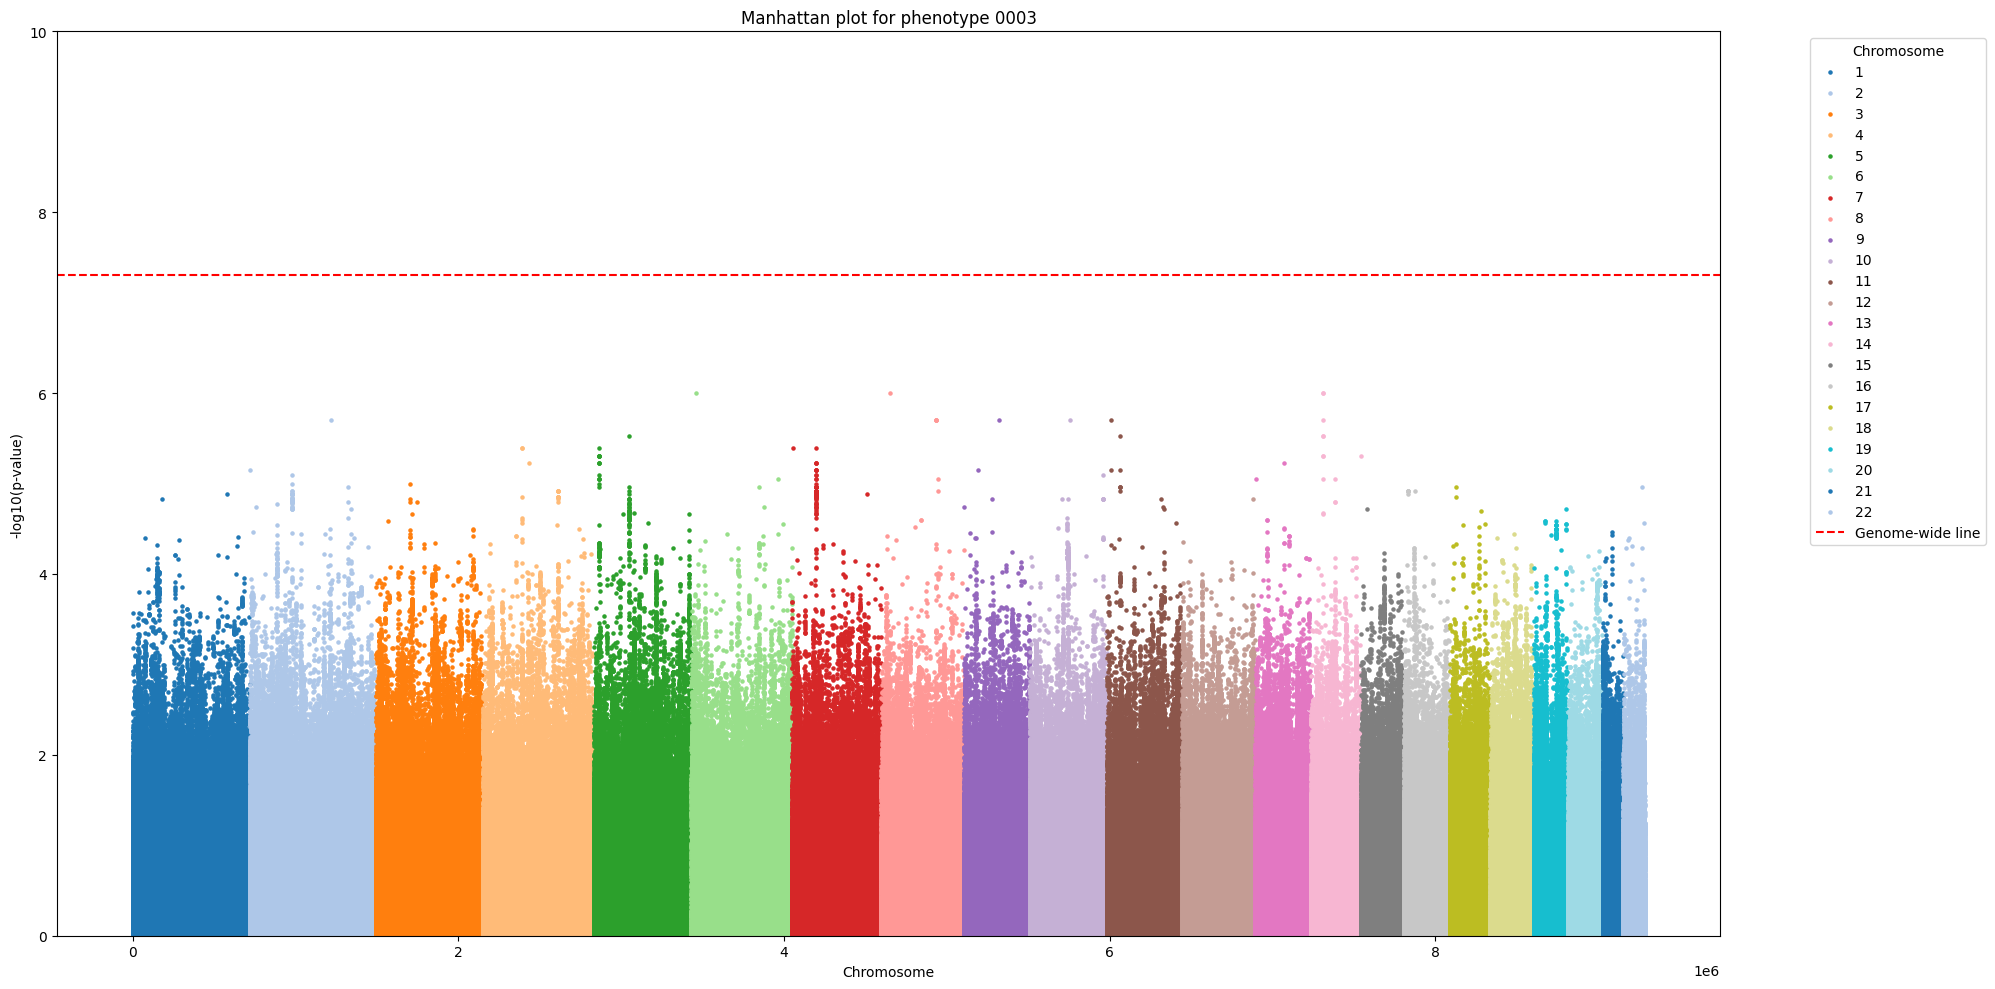

/home/haoyu/anaconda3/envs/rap/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


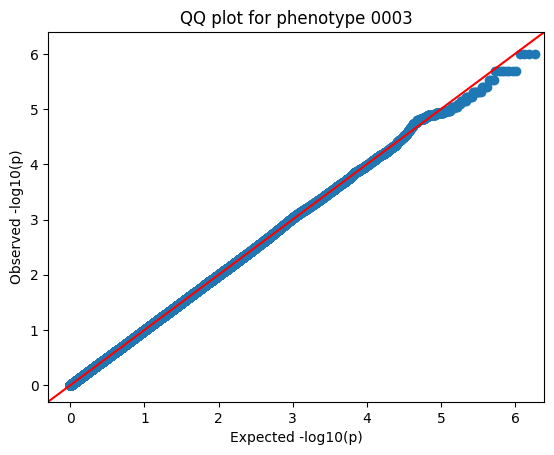

Phenotype 4: Dimensions = (9284812, 8)
   #CHROM    POS           ID REF A1      BETA        SE         P
0       1  17594  rs377698370   C  T  0.048649  0.077344  0.529363
1       1  17746  rs370884870   A  G -0.053068  0.112473  0.637061
2       1  54421  rs146477069   A  G  0.041987  0.066869  0.530081
3       1  61920   rs62637820   G  A -0.097127  0.067020  0.147307
4       1  62738   rs11810446   T  C -0.011430  0.058562  0.845251


/tmp/ipykernel_3838207/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


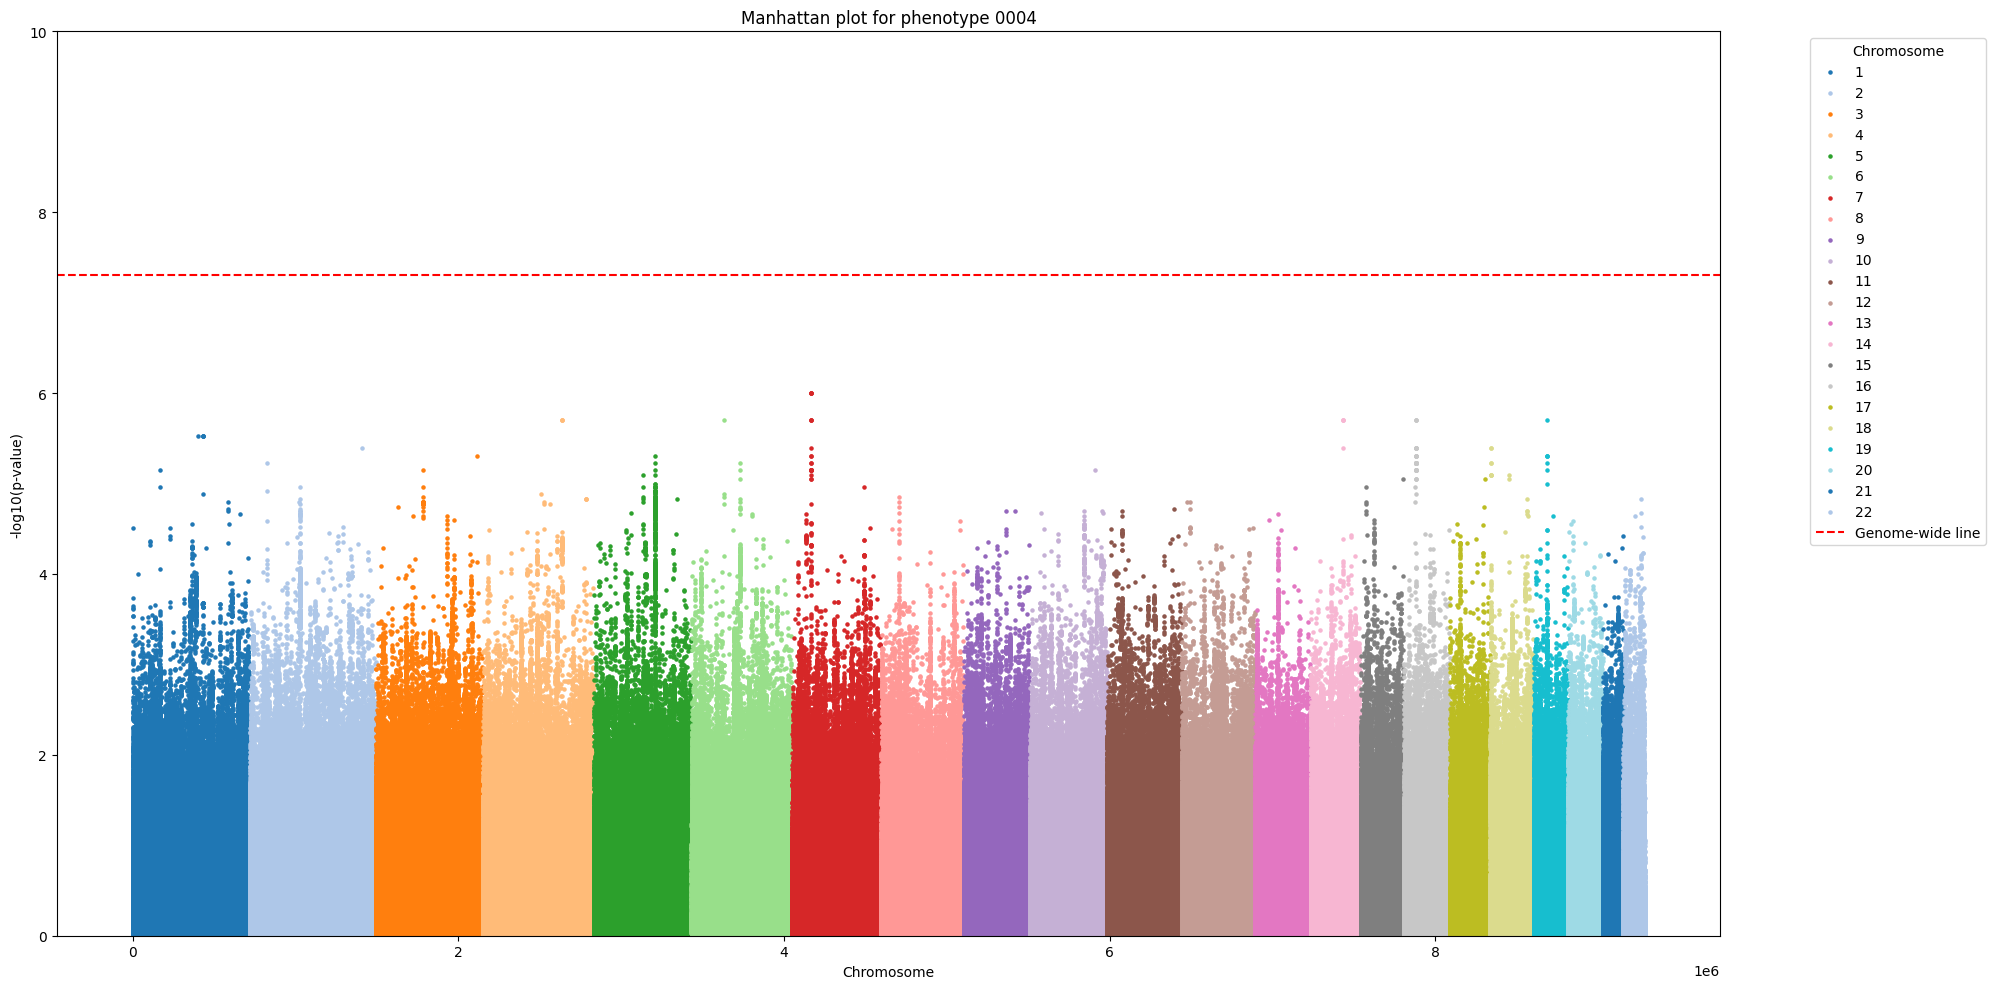

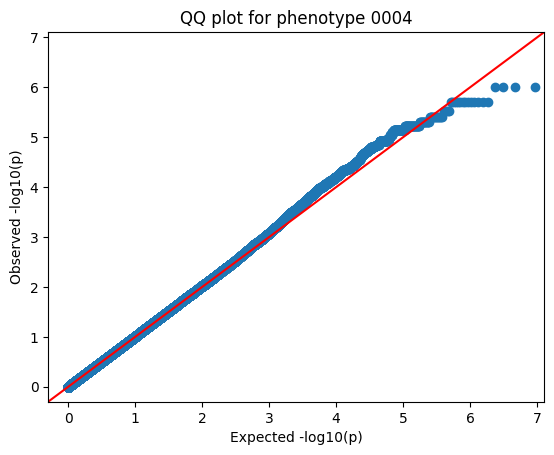

Phenotype 5: Dimensions = (9284812, 8)
   #CHROM    POS           ID REF A1      BETA        SE         P
0       1  17594  rs377698370   C  T  0.009745  0.077575  0.900038
1       1  17746  rs370884870   A  G  0.039633  0.112808  0.725345
2       1  54421  rs146477069   A  G  0.090761  0.067063  0.175966
3       1  61920   rs62637820   G  A  0.034847  0.067225  0.604217
4       1  62738   rs11810446   T  C  0.058426  0.058732  0.319862


/tmp/ipykernel_3838207/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


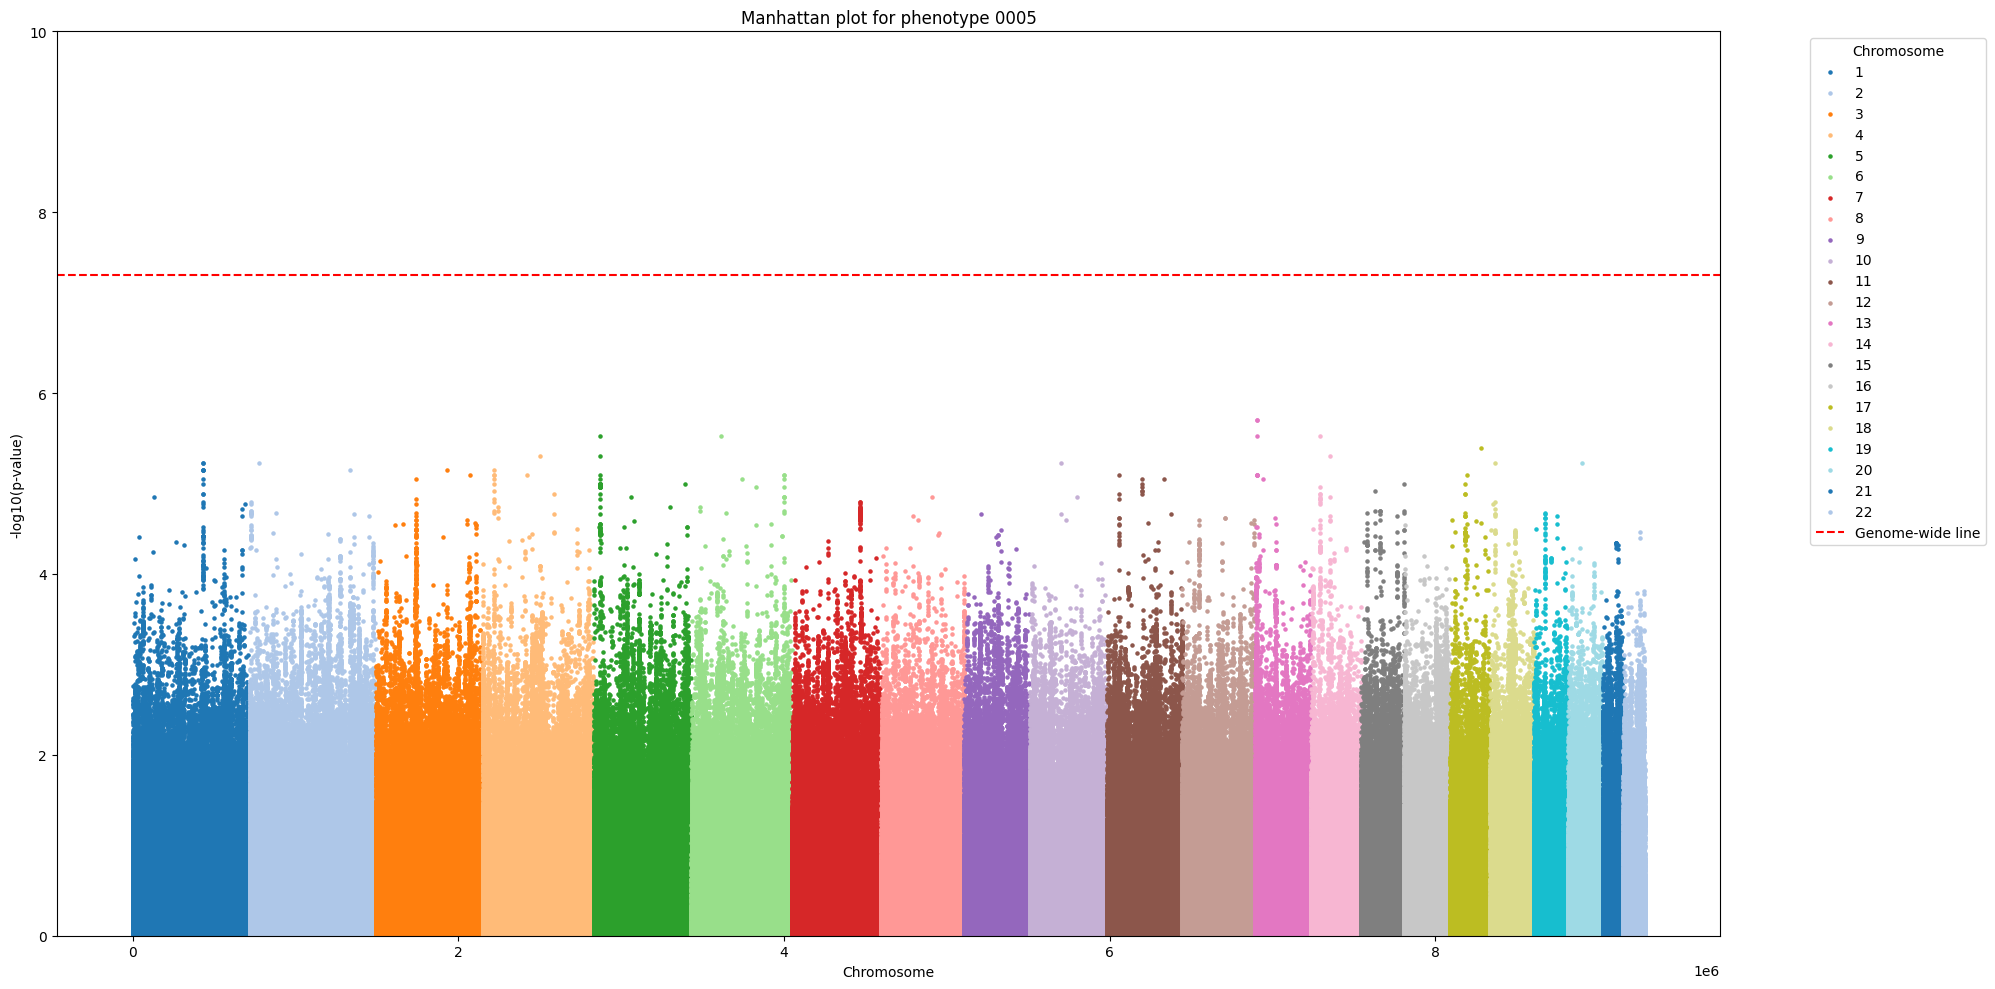

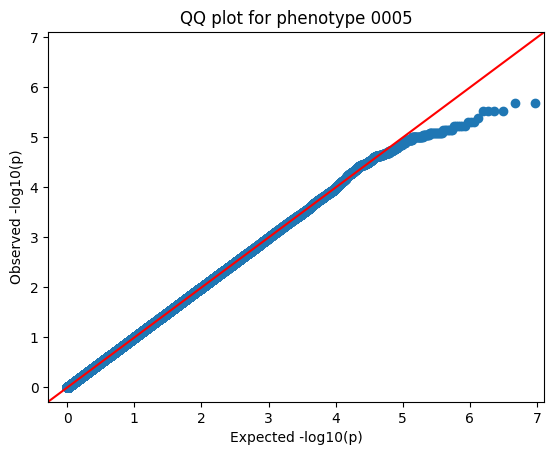

Phenotype 6: Dimensions = (9284812, 8)
   #CHROM    POS           ID REF A1      BETA        SE         P
0       1  17594  rs377698370   C  T -0.035115  0.078669  0.655342
1       1  17746  rs370884870   A  G  0.041234  0.114399  0.718525
2       1  54421  rs146477069   A  G  0.069439  0.068012  0.307284
3       1  61920   rs62637820   G  A -0.020599  0.068174  0.762539
4       1  62738   rs11810446   T  C  0.037422  0.059563  0.529840


/tmp/ipykernel_3838207/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


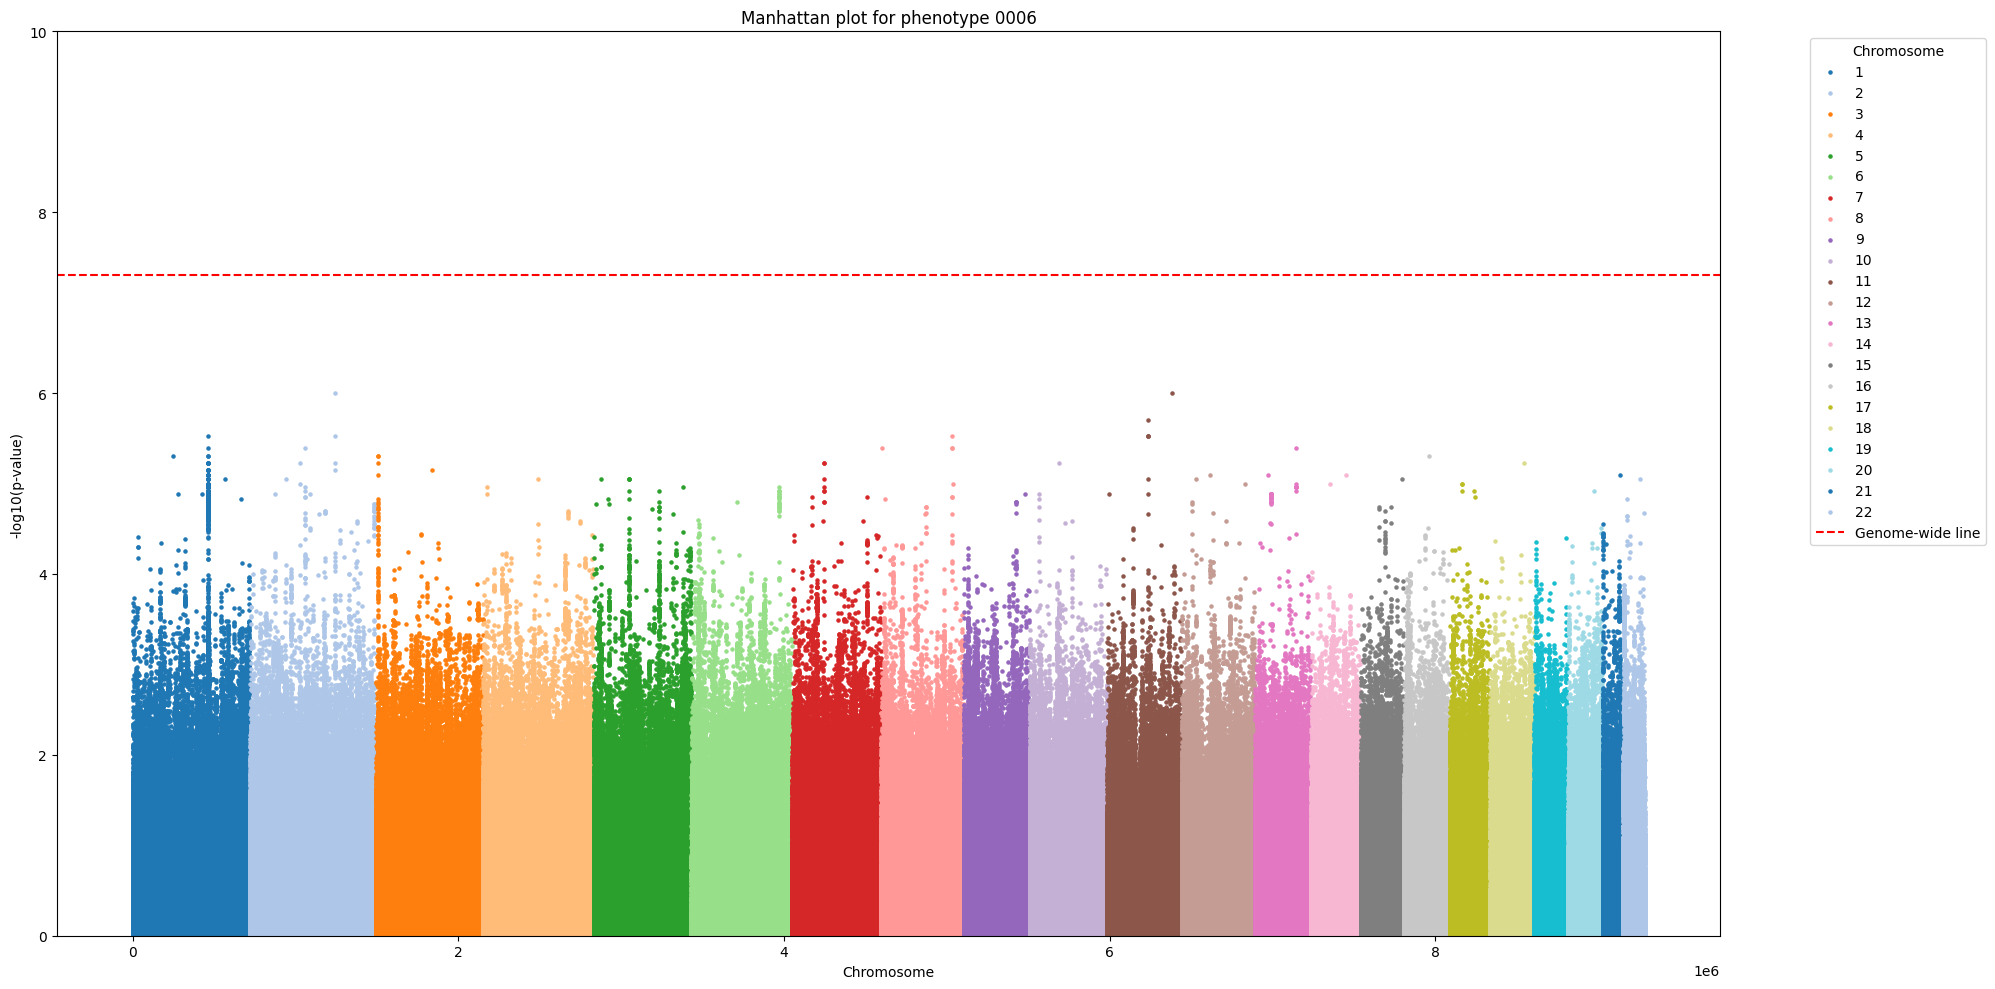

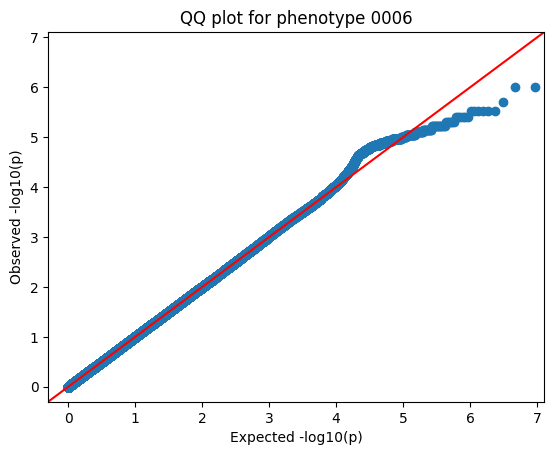

Phenotype 7: Dimensions = (9284812, 8)
   #CHROM    POS           ID REF A1      BETA        SE         P
0       1  17594  rs377698370   C  T -0.013065  0.076945  0.865176
1       1  17746  rs370884870   A  G  0.123823  0.111885  0.268454
2       1  54421  rs146477069   A  G  0.003300  0.066524  0.960440
3       1  61920   rs62637820   G  A  0.077094  0.066675  0.247602
4       1  62738   rs11810446   T  C  0.015605  0.058258  0.788806


/home/haoyu/anaconda3/envs/rap/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_3838207/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


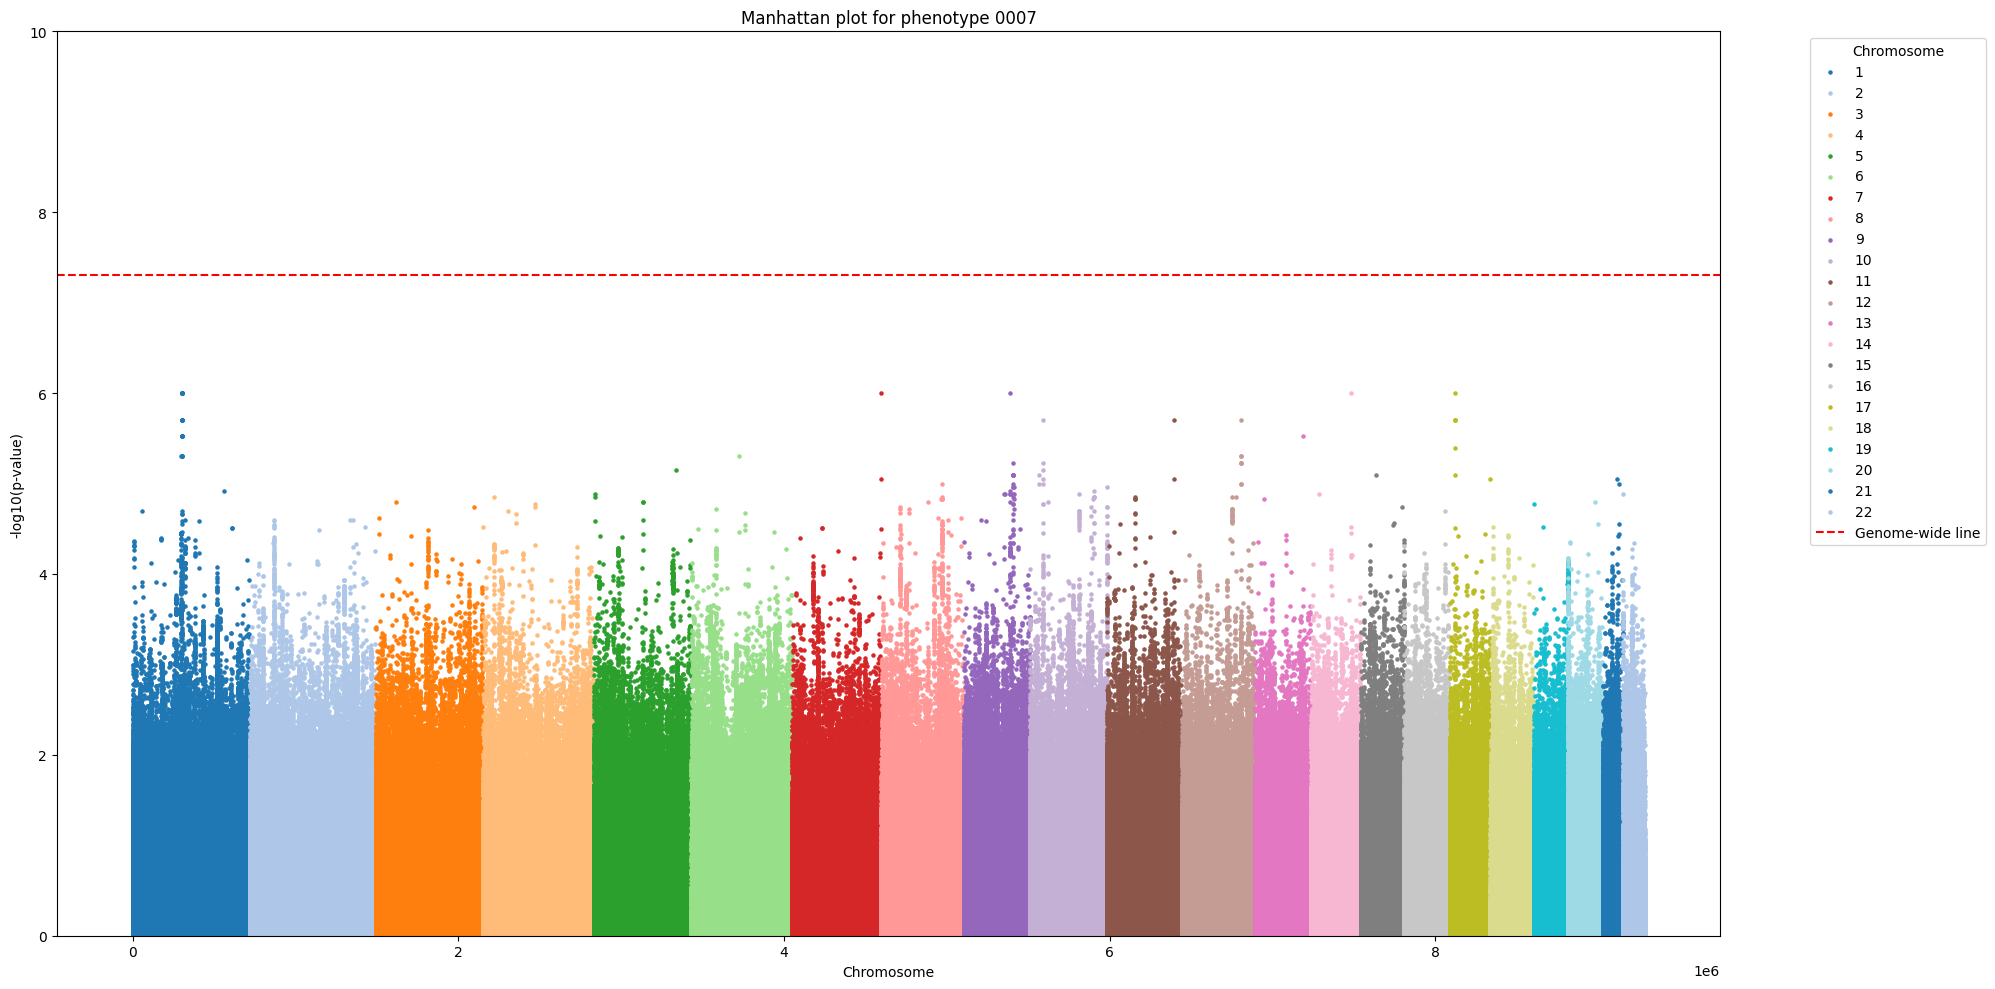

/home/haoyu/anaconda3/envs/rap/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


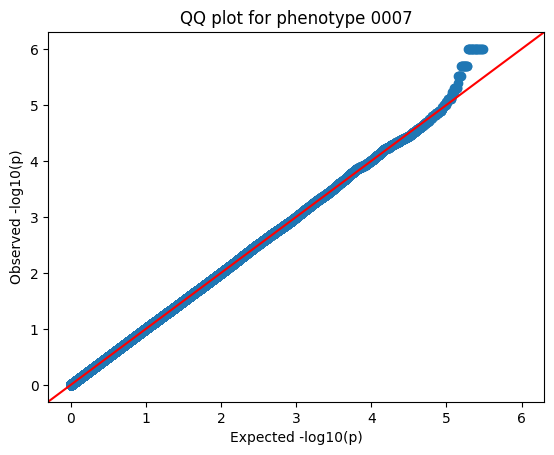

Phenotype 8: Dimensions = (9284812, 8)
   #CHROM    POS           ID REF A1      BETA        SE         P
0       1  17594  rs377698370   C  T  0.111961  0.077509  0.148635
1       1  17746  rs370884870   A  G  0.173295  0.112711  0.124198
2       1  54421  rs146477069   A  G -0.011004  0.067019  0.869580
3       1  61920   rs62637820   G  A  0.105925  0.067168  0.114822
4       1  62738   rs11810446   T  C  0.002652  0.058692  0.963960


/home/haoyu/anaconda3/envs/rap/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_3838207/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


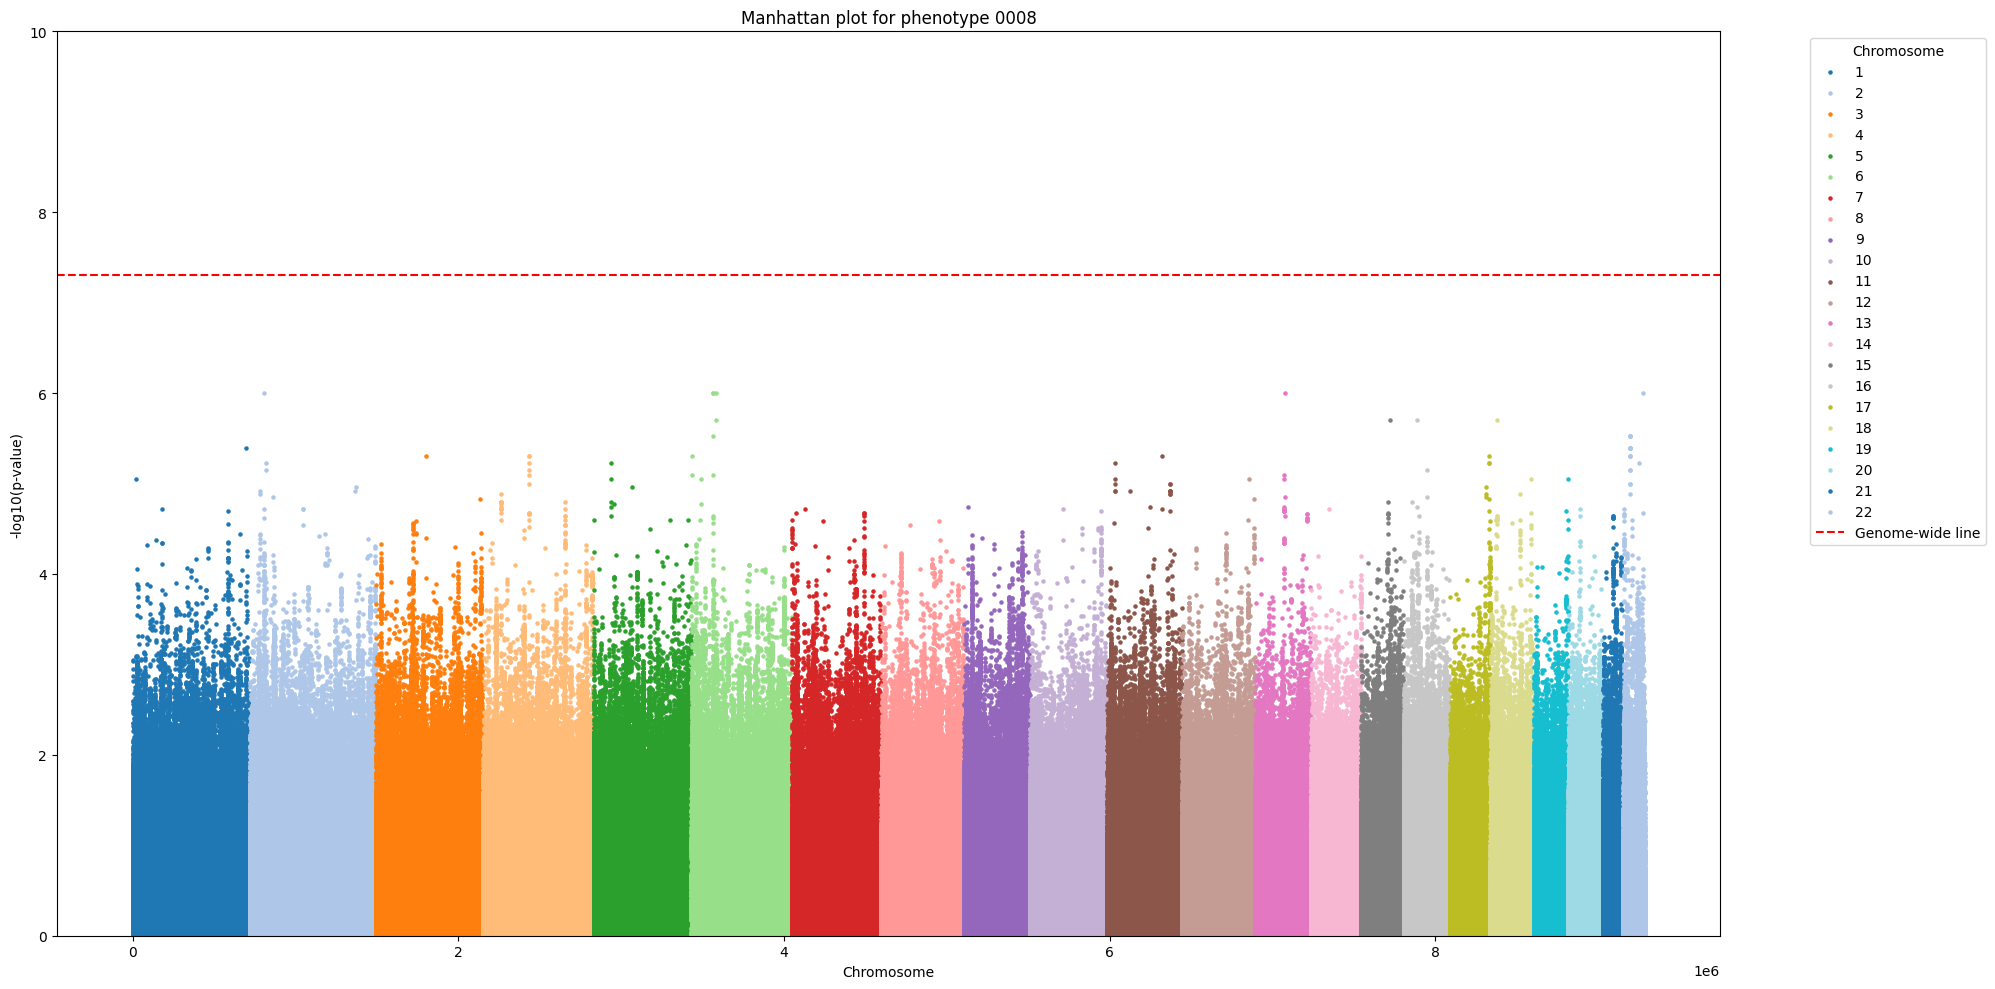

/home/haoyu/anaconda3/envs/rap/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


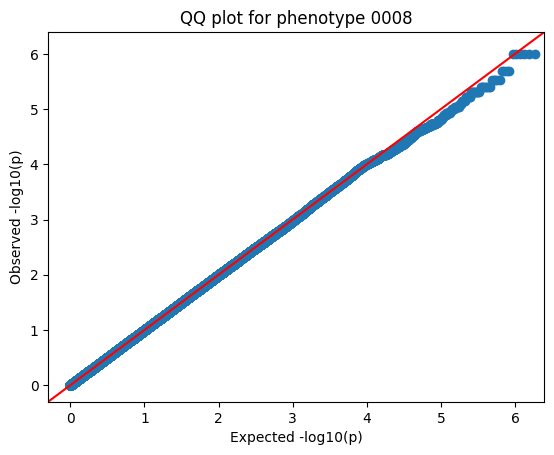

Phenotype 9: Dimensions = (9284812, 8)
   #CHROM    POS           ID REF A1      BETA        SE         P
0       1  17594  rs377698370   C  T  0.070188  0.077025  0.362191
1       1  17746  rs370884870   A  G -0.115838  0.112007  0.301063
2       1  54421  rs146477069   A  G -0.020639  0.066596  0.756636
3       1  61920   rs62637820   G  A -0.054592  0.066750  0.413456
4       1  62738   rs11810446   T  C -0.030805  0.058320  0.597369


/home/haoyu/anaconda3/envs/rap/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_3838207/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


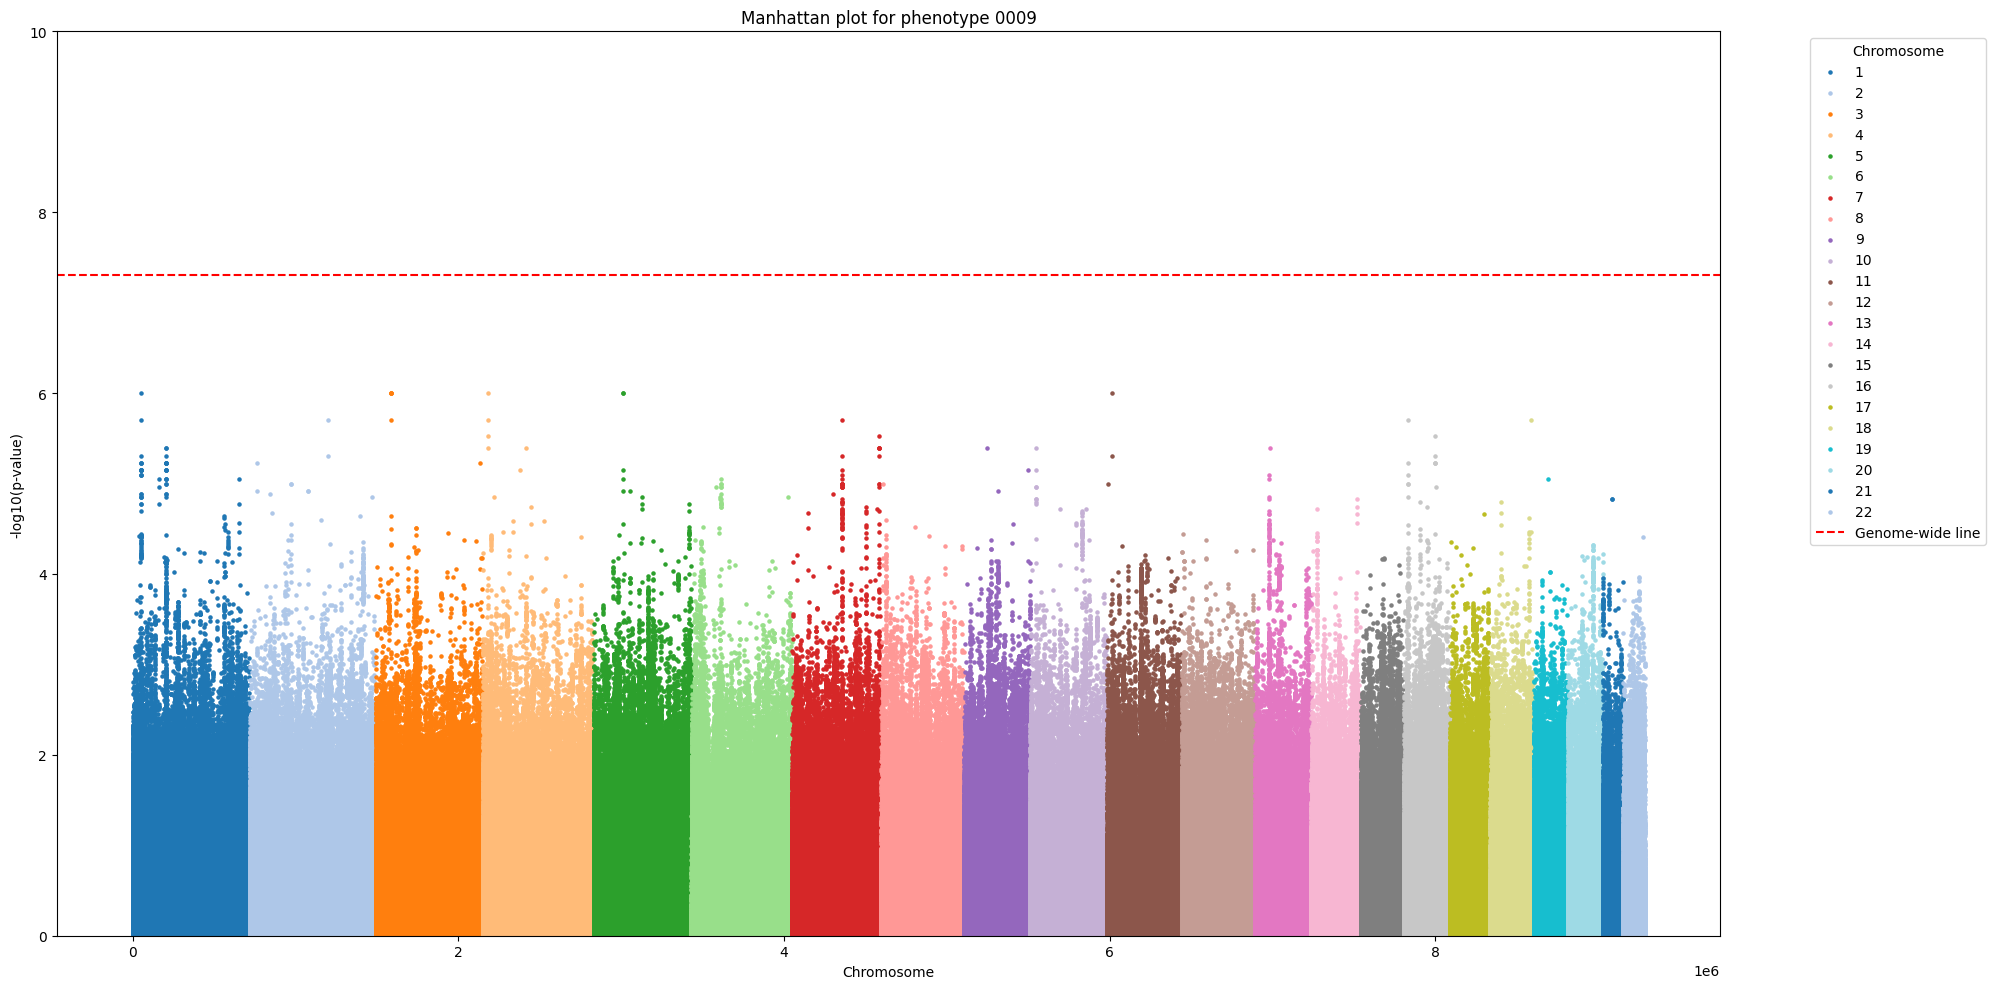

/home/haoyu/anaconda3/envs/rap/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


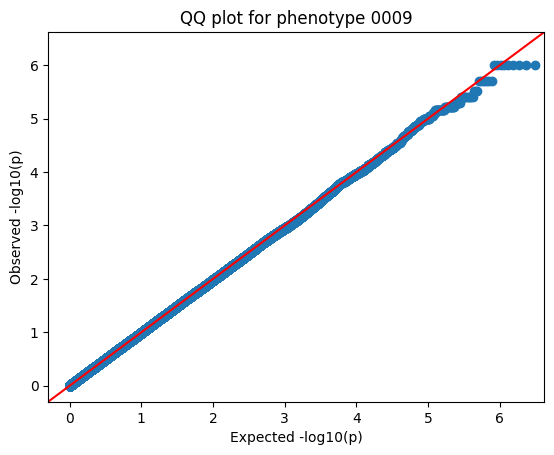

In [28]:
num_rand_phenotypes = 10

for phenotype in range(num_rand_phenotypes):
    filename = f"random.pheno{phenotype:04d}.glm.linear.tsv.gz"
    
    # Load data
    gwas = load_gwas_data(filename)
    print(f"Phenotype {phenotype}: Dimensions = {gwas.shape}")
    print(gwas.head())
    
    # Manhattan plot
    plot_manhattan(
        gwas,
        chr_col="#CHROM",
        bp_col="POS",
        p_col="P",
        snp_col="ID",
        title=f"Manhattan plot for phenotype {phenotype:04d}"
    )
    
    # QQ plot
    plot_qq(gwas["P"], title=f"QQ plot for phenotype {phenotype:04d}")
